In [34]:
import random
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('table.csv')
df

,A,B,C,D,E,F,G,H,I,J
0,83,80,76,79,81,69,78,87,72,84
1,73,85,76,79,75,65,77,89,83,70
2,90,82,79,88,88,86,84,81,74,70
3,92,73,80,80,87,81,77,74,66,68
4,71,78,85,78,82,75,71,77,86,74


In [36]:
n = df.shape[0] * df.shape[1]
n

50

In [37]:
k = random.randrange(8, 9 + 1)
k
# k_1 = 1 + 3.322 * np.emath.log(n)
# k_1

9

In [45]:
ndf = df.to_numpy()
max_v = ndf.max()
min_v = ndf.min()
r = max_v - min_v
r

27

In [46]:
h = r/k
h

3.0

In [55]:
intervals = []
v = min_v
for _ in range(k):
    intervals.append((int(v), int(v + h)))
    v += h
intervals

mid_intervals = []
for rng in intervals:
    mid_intervals.append((rng[1] + rng[0]) / 2)
mid_intervals = np.array(mid_intervals).reshape(-1)
mid_intervals

array([66.5, 69.5, 72.5, 75.5, 78.5, 81.5, 84.5, 87.5, 90.5])

In [78]:
line_ndf = pd.Series(ndf.reshape(-1), index=ndf.reshape(-1))
line_ndf
cut_df = pd.cut(line_ndf, bins=k, right=False, retbins=True, precision=1)[0]
freq_df = cut_df.groupby(cut_df, observed=True).count()
freq_df

[65.0, 68.0)    2
[68.0, 71.0)    4
[71.0, 74.0)    5
[74.0, 77.0)    7
[77.0, 80.0)    9
[80.0, 83.0)    8
[83.0, 86.0)    6
[86.0, 89.0)    6
[89.0, 92.0)    3
dtype: int64

In [83]:
int_df = pd.DataFrame(index=intervals)
int_df['Середина интервала'] = mid_intervals
int_df['Частота'] = freq_df.values
int_df = int_df.assign(ПлотностьЧастоты = lambda row: (row['Частота']/h))
int_df = int_df.assign(ОтносительнаяЧастота = lambda row: (row['Частота']/n))
int_df = int_df.assign(ПлотностьОтносительнойЧастоты = lambda row: (row['ОтносительнаяЧастота']/h))
int_df

,Середина интервала,Частота,ПлотностьЧастоты,ОтносительнаяЧастота,ПлотностьОтносительнойЧастоты
"(65, 68)",66.5,2,0.666667,0.04,0.013333
"(68, 71)",69.5,4,1.333333,0.08,0.026667
"(71, 74)",72.5,5,1.666667,0.10,0.033333
"(74, 77)",75.5,7,2.333333,0.14,0.046667
"(77, 80)",78.5,9,3.000000,0.18,0.060000
"(80, 83)",81.5,8,2.666667,0.16,0.053333
"(83, 86)",84.5,6,2.000000,0.12,0.040000
"(86, 89)",87.5,6,2.000000,0.12,0.040000
"(89, 92)",90.5,3,1.000000,0.06,0.020000


<Axes: >

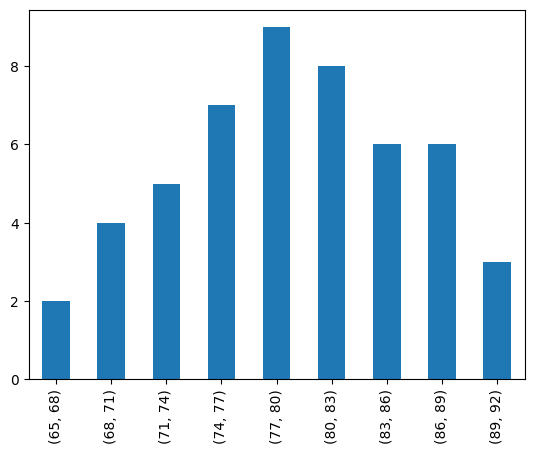

In [84]:
int_df['Частота'].plot.bar()

In [100]:
un_ndf = np.unique(ndf).reshape(-1)
counts = pd.Series(ndf.reshape(-1)).groupby(pd.Series(ndf.reshape(-1))).count()

discr_df = pd.Series(counts.values, index=un_ndf)
discr_df

65    1
66    1
68    1
69    1
70    2
71    2
72    1
73    2
74    3
75    2
76    2
77    3
78    3
79    3
80    3
81    3
82    2
83    2
84    2
85    2
86    2
87    2
88    2
89    1
90    1
92    1
dtype: int64